In [4]:
import sys  
sys.path.insert(0, './gore')
import gore
import gore2
import cv2
import matplotlib.pyplot as plt

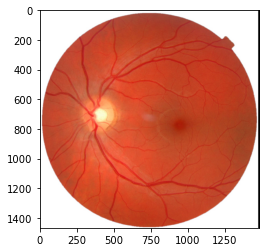

In [12]:
im2 = cv2.imread('./img/img1.jpg')
fundus2, lammax, phimax = gore2.equi(im = im2, focal_length = 24, alpha_max = gore.deg2rad(32), numpoints = 400)
fundus2 = fundus2[:,:,::-1]
plt.imshow(fundus2)